## Pre-Processing and Analysis

In [260]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
# Disables Python warnings
warnings.filterwarnings('ignore')

In [262]:
# Load the dataset
df = pd.read_csv('sales.csv')
df

,orderid,Customer Name,shipmode,sales,quantity,discount,profit,segment,region,state,subcategory,category,orderdate_day,orderdate_weekday,orderdate_month,orderdate_year,shipdate_day,shipdate_month,shipdate_year,preparationtime
0,1,Muhammed MacIntyre,First Class,825.174,9,0.30,-117.8820,Corporate,Central,Illinois,Bookcases ...,Furniture,4,Sonntag,9,2016,6,9,2016,2
1,2,Ruben Dartt,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,Bookcases ...,Furniture,5,Freitag,9,2014,9,9,2014,4
2,3,Liz Pelletier,Same Day,411.332,4,0.15,-4.8392,Home Office,West,California,Bookcases ...,Furniture,28,Donnerstag,11,2013,28,11,2013,0
3,4,Liz Pelletier,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,Bookcases ...,Furniture,30,Montag,5,2016,31,5,2016,1
4,5,Liz Pelletier,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,Bookcases ...,Furniture,31,Dienstag,12,2013,7,1,2014,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,Max Jones,First Class,1097.544,7,0.20,123.4737,Corporate,Central,Texas,Phones ...,Technology,9,Mittwoch,12,2015,11,12,2015,2
9990,9991,Kristina Nunn,First Class,979.950,5,0.00,284.1855,Consumer,East,Massachusetts,Phones ...,Technology,2,Freitag,12,2016,4,12,2016,2
9991,9992,Kristina Nunn,Standard Class,235.188,2,0.40,-43.1178,Corporate,East,Ohio,Phones ...,Technology,12,Sonntag,1,2014,17,1,2014,5
9992,9993,Sean Miller,First Class,391.980,2,0.00,113.6742,Consumer,East,Delaware,Phones ...,Technology,22,Donnerstag,9,2016,24,9,2016,2


In [263]:
# Shows the information of the raw data such as data types
# and an indication of any null content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   orderid            9994 non-null   int64  
 1   Customer Name      9994 non-null   object 
 2   shipmode           9994 non-null   object 
 3   sales              9994 non-null   float64
 4   quantity           9994 non-null   int64  
 5   discount           9994 non-null   float64
 6   profit             9994 non-null   float64
 7   segment            9994 non-null   object 
 8   region             9994 non-null   object 
 9   state              9994 non-null   object 
 10  subcategory        9994 non-null   object 
 11  category           9994 non-null   object 
 12  orderdate_day      9994 non-null   int64  
 13  orderdate_weekday  9994 non-null   object 
 14  orderdate_month    9994 non-null   int64  
 15  orderdate_year     9994 non-null   int64  
 16  shipdate_day       9994 

In [264]:
# Shows a statistical analysis of each column such as the mean, standard deviation, etc.
df.describe()

,orderid,sales,quantity,discount,profit,orderdate_day,orderdate_month,orderdate_year,shipdate_day,shipdate_month,shipdate_year,preparationtime
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896,15.601461,7.805683,2014.722934,15.829798,7.738043,2014.738743,3.958175
std,2885.163629,623.245101,2.225110,0.206452,234.260108,8.744958,3.287618,1.124039,8.803977,3.345842,1.127020,1.747567
min,1.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,1.000000,2013.000000,1.000000,1.000000,2013.000000,0.000000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750,8.000000,5.000000,2014.000000,8.000000,5.000000,2014.000000,3.000000
50%,4997.500000,54.490000,3.000000,0.200000,8.666500,16.000000,9.000000,2015.000000,16.000000,9.000000,2015.000000,4.000000
75%,7495.750000,209.940000,5.000000,0.200000,29.364000,23.000000,11.000000,2016.000000,24.000000,11.000000,2016.000000,5.000000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000,31.000000,12.000000,2016.000000,31.000000,12.000000,2017.000000,7.000000


In [265]:
# Displays the (rows, columns) of the dataset
df.shape

(9994, 20)

In [266]:
# Removes any rows with blank data and does a final check displaying a boolean value
df.dropna(axis=0, inplace=True)
df.isnull().values.any()

np.False_

In [267]:
# Shows the number of unique values in each column
df.nunique()

orderid              9994
Customer Name         795
shipmode                4
sales                5825
quantity               14
discount               12
profit               7287
segment                 3
region                  4
state                  49
subcategory            17
category                3
orderdate_day          31
orderdate_weekday       7
orderdate_month        12
orderdate_year          4
shipdate_day           31
shipdate_month         12
shipdate_year           5
preparationtime         8
dtype: int64

In [268]:
# Creates two new columns combining the days, months, and years
# for the ship date and order date. It also removes all the unnecessary columns from the dataset
df['orderdate'] = pd.to_datetime(df[['orderdate_year', 'orderdate_month', 'orderdate_day']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
df['shipdate'] = pd.to_datetime(df[['shipdate_year', 'shipdate_month', 'shipdate_day']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

df.drop(['orderdate_year', 'orderdate_month', 'orderdate_day', 'orderdate_weekday', 'shipdate_year', 'shipdate_month', 'shipdate_day'], axis=1, inplace=True)

In [269]:
# Removes any duplicates
df.drop_duplicates(inplace=True)

In [270]:
# Shows the information of the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   orderid          9994 non-null   int64         
 1   Customer Name    9994 non-null   object        
 2   shipmode         9994 non-null   object        
 3   sales            9994 non-null   float64       
 4   quantity         9994 non-null   int64         
 5   discount         9994 non-null   float64       
 6   profit           9994 non-null   float64       
 7   segment          9994 non-null   object        
 8   region           9994 non-null   object        
 9   state            9994 non-null   object        
 10  subcategory      9994 non-null   object        
 11  category         9994 non-null   object        
 12  preparationtime  9994 non-null   int64         
 13  orderdate        9994 non-null   datetime64[ns]
 14  shipdate         9994 non-null   datetim

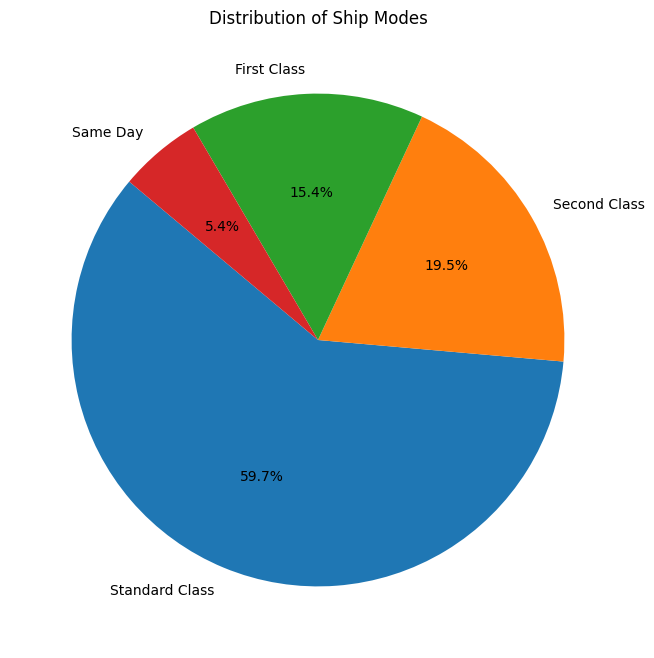

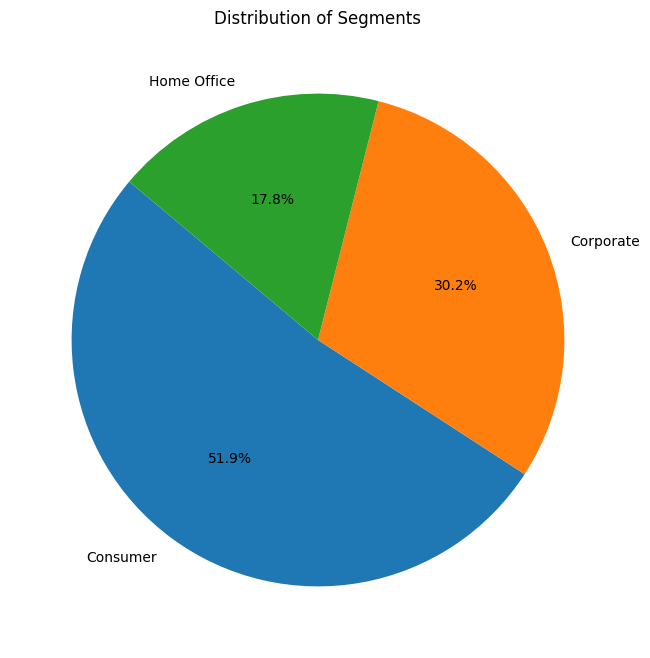

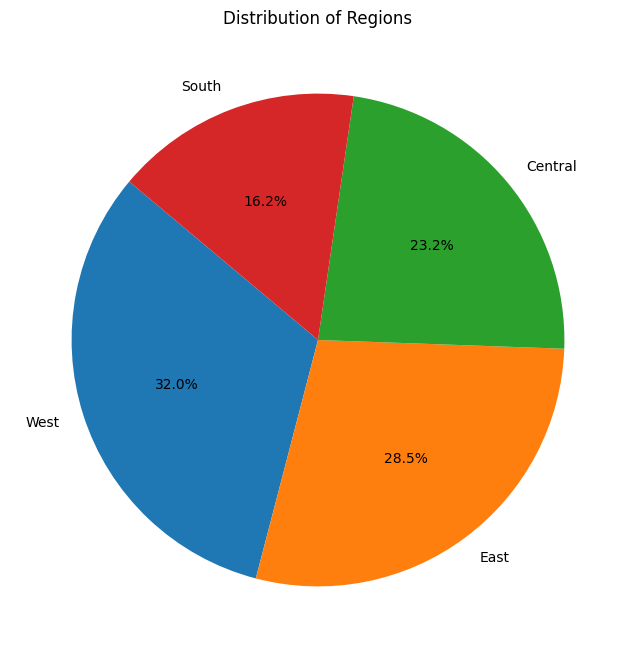

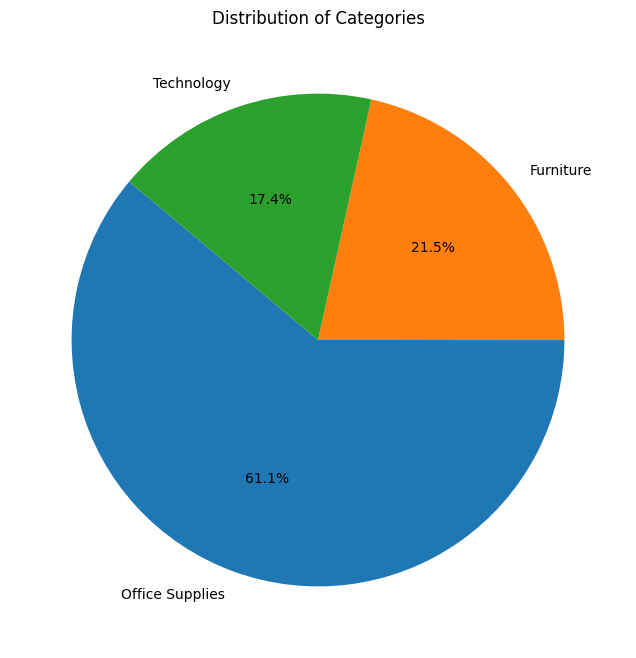

In [271]:
# Generating pie charts to illustrate the distribution of categorical data
shipmode_counts = df['shipmode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(shipmode_counts, labels=shipmode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ship Modes')
plt.show()

segment_counts = df['segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Segments')
plt.show()

region_counts = df['region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Regions')
plt.show()

category_counts = df['category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.show()

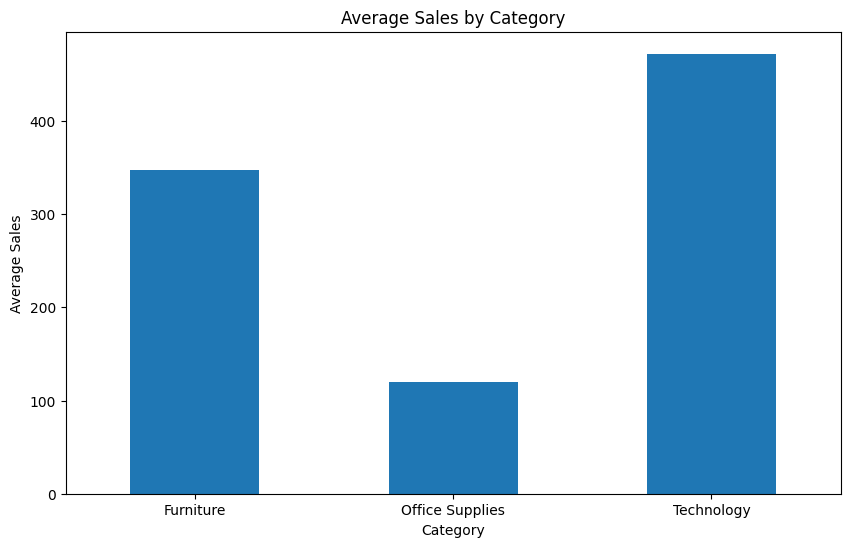

In [272]:
# Creates a bar chart illustrating the sales in each category
avg_sales_category = df.groupby('category')['sales'].mean()
plt.figure(figsize=(10, 6))
avg_sales_category.plot(kind='bar')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

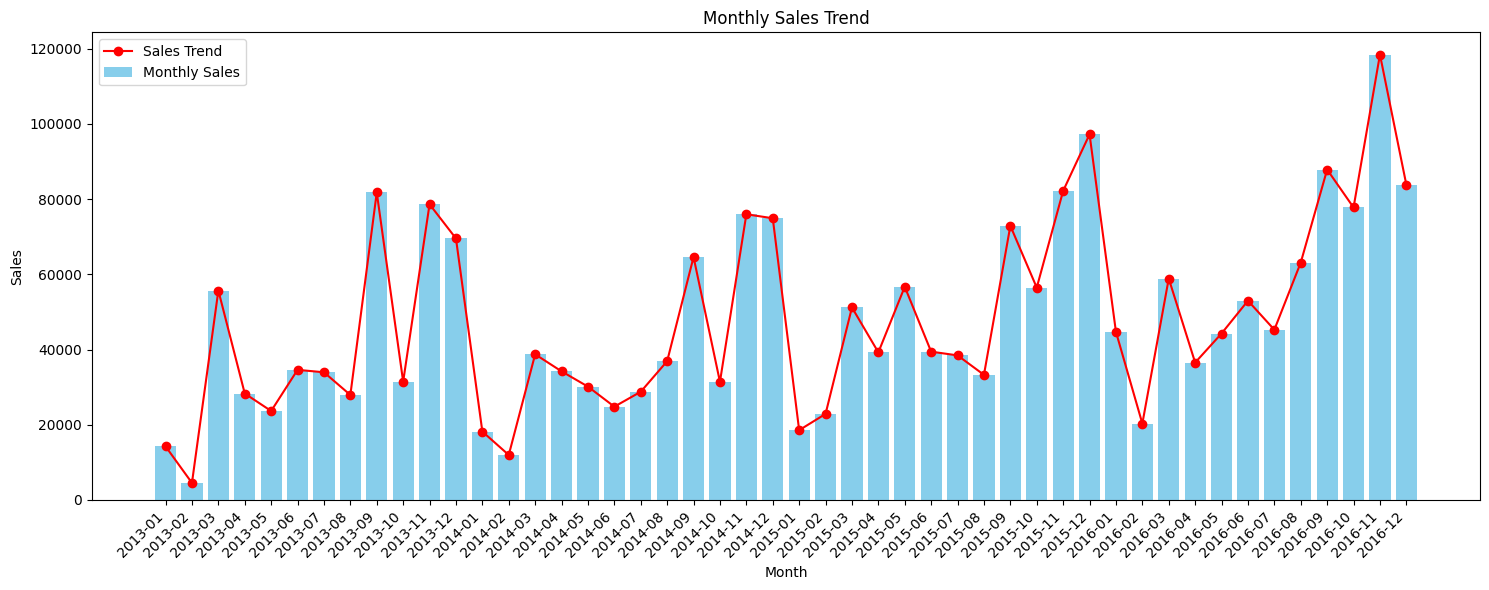

In [273]:
# Plots a combined bar chart and line chart shoung the Monthly Sales trend
monthly_sales = df.groupby(df['orderdate'].dt.to_period('M'))['sales'].sum()

plt.figure(figsize=(15, 6))

plt.bar(monthly_sales.index.astype(str), monthly_sales.values, color='skyblue', label='Monthly Sales')
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='red', linestyle='-', label='Sales Trend')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [274]:
# Displays the correlation matrix between each column as a table
correlation = df.select_dtypes(include='number')
correlation = correlation.corr()
correlation

,orderid,sales,quantity,discount,profit,preparationtime
orderid,1.000000,0.044217,-0.011177,-0.144017,0.074888,-0.004048
sales,0.044217,1.000000,0.200795,-0.028190,0.479064,-0.007354
quantity,-0.011177,0.200795,1.000000,0.008623,0.066253,0.018298
discount,-0.144017,-0.028190,0.008623,1.000000,-0.219487,0.000408
profit,0.074888,0.479064,0.066253,-0.219487,1.000000,-0.004649
preparationtime,-0.004048,-0.007354,0.018298,0.000408,-0.004649,1.000000


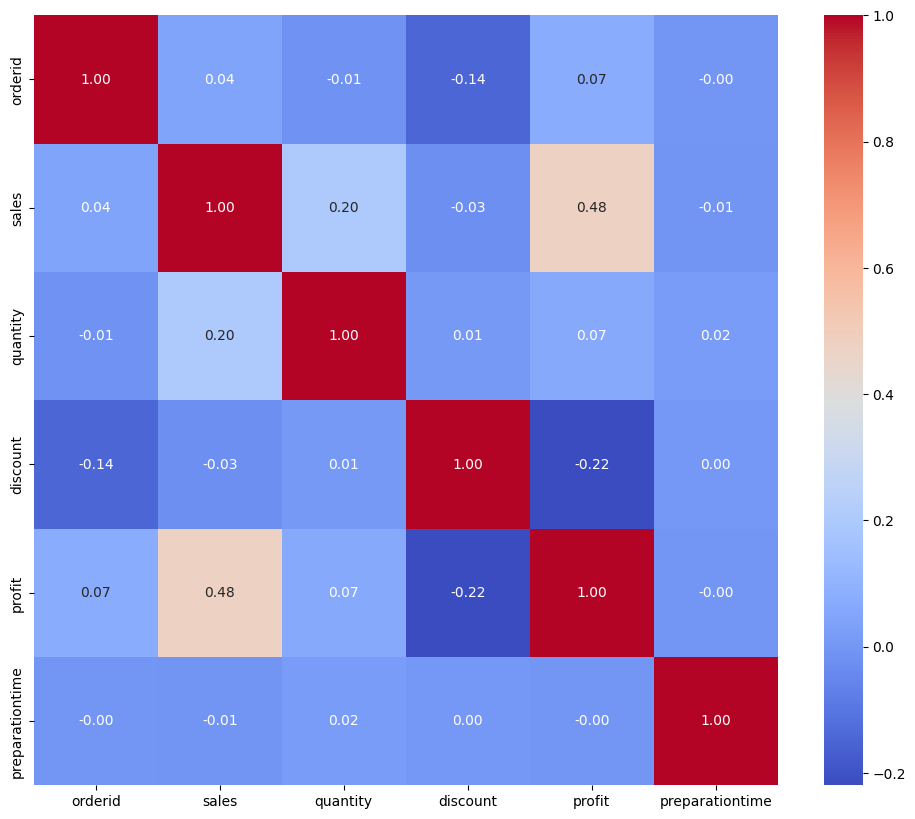

In [275]:
# Displays correlation matrix as a heatmap using the 'matplotlib' and 'seaborn' libraries
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

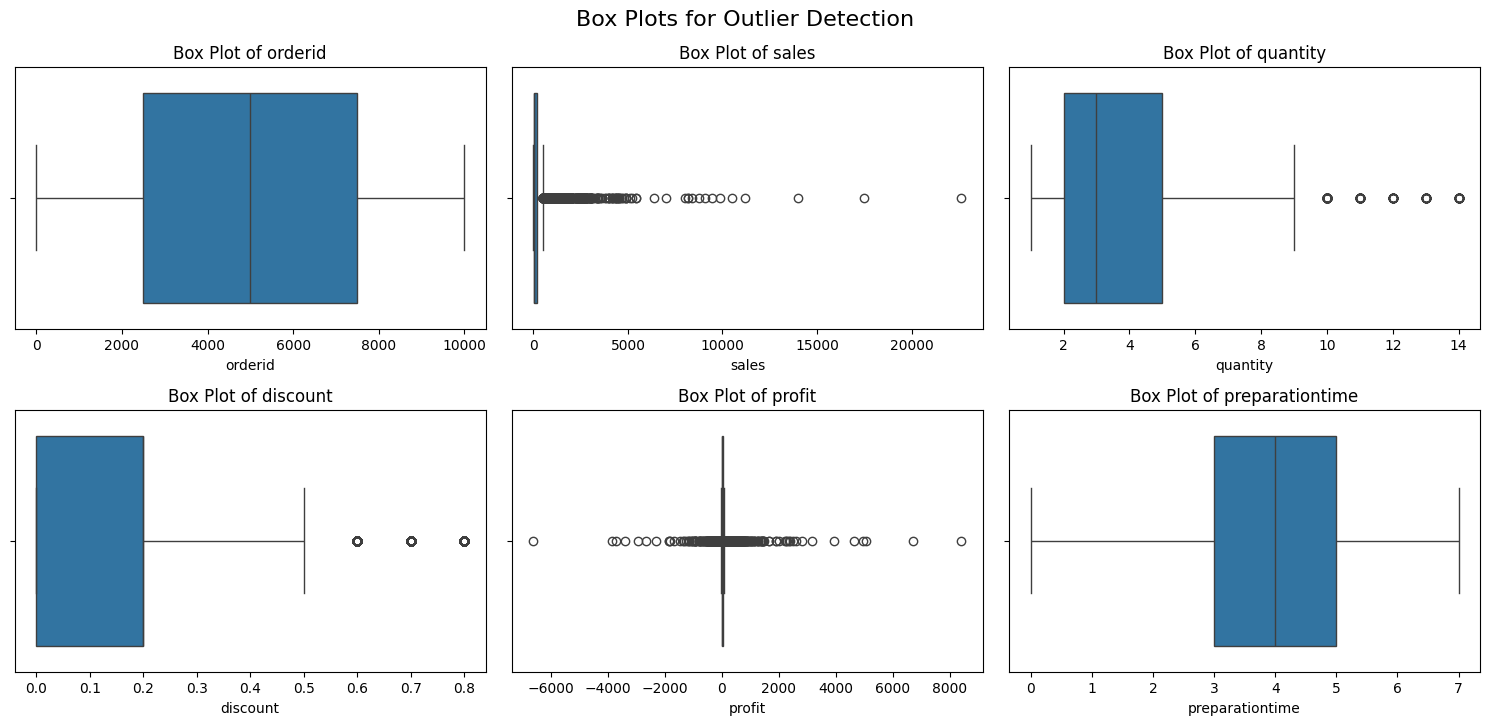

In [276]:
# Box plots to identify outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.suptitle('Box Plots for Outlier Detection', size=16, y=1.02)
plt.show()


In [277]:
# Removes outliers from the dataset using z-score
for col in numerical_cols:
    df[f'{col}_zscore'] = zscore(df[col])
    df = df[np.abs(df[f'{col}_zscore']) <= 2]
    df.drop(columns=[f'{col}_zscore'], inplace=True)

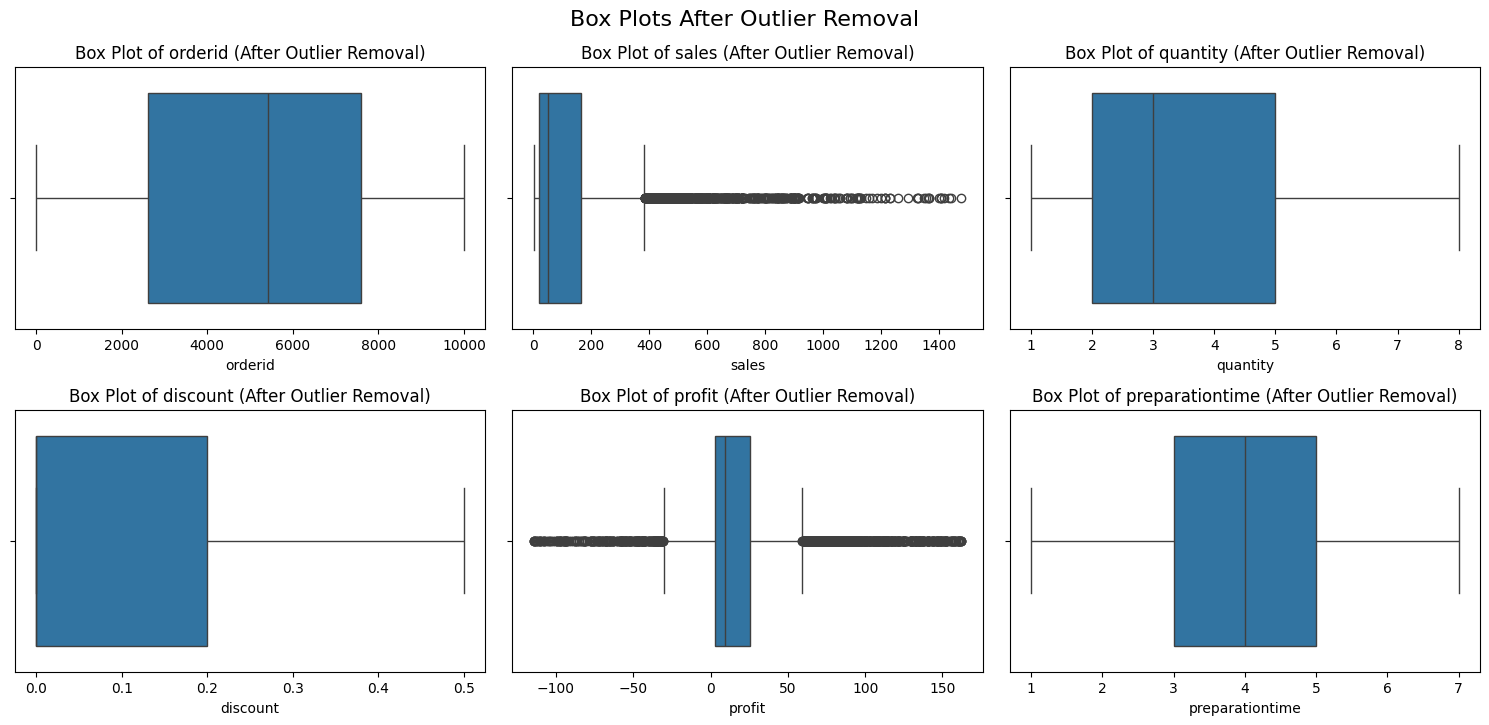

In [278]:
# Box plots to show the numerical features after outlier removal
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.suptitle('Box Plots After Outlier Removal', size=16, y=1.02)
plt.show()

In [279]:
# Shows the number of columns and rows after the outlier removal
df.shape

(7695, 15)

In [280]:
# Saves the cleaned dataset as a new .csv file, ready to be used for machine learning algorithms
df.to_csv('cleaned_dataset.csv', index=False)